In [1]:
# Set project directory
import os
import sys


def project_dir():
    notebook_path = %pwd
    repo_name = "worldbank_data_exploration"
    repo_folder = notebook_path.split(repo_name)[0]
    return os.path.join(repo_folder, repo_name)


pwd = os.getenv("PWD", project_dir())
os.environ["PWD"] = pwd
sys.path.append(pwd)

In [2]:
import warnings

warnings.simplefilter("ignore", category=UserWarning)
warnings.simplefilter("ignore", category=FutureWarning)

from data_sources.load_dataset import (
    load_time_series,
    INDICATORS_SELECTED,
    INDICATORS_AGRICULTURE,
    INDICATORS_ECONOMY,
    INDICATORS_HEALTH,
    ALL_INDICATORS,
)
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import umap
from umap import UMAP
from clustering import hierarchical_clustering

In [3]:
def data_combined_embedded_visualization(
    data_dict_clustered, title, feature_extraction=False
):
    embedded = UMAP(
        n_components=2, n_neighbors=6, min_dist=0.4, metric="correlation"
    ).fit_transform(data_dict_clustered[:, :-1])
    plot_with_names(
        embedded, countries, data_dict_clustered[:, -1], title, feature_extraction
    )


def plot_with_names(X, y, labels, title=None, feature_extraction=False):
    images_dir = os.path.join(pwd, "images")

    plt.figure(figsize=(16, 16))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=cm.Set1)
    for i in range(X.shape[0]):
        plt.annotate(y[i], [X[i, 0], X[i, 1]], size=7.5)
    if title is not None:
        plt.title(title)
    if feature_extraction:
        title = title + "_with_feature_extraction"
    plt.tight_layout()
    plt.savefig(
        os.path.join(
            os.path.join(images_dir, "combined"),
            title.replace(" ", "_") + "_clustered.pdf",
        )
    )
    plt.show()

# Selected indicators

In [4]:
NUMBER_OF_CLUSTERS_SELECTED_INDICATORS_COMBINED = 2
NUMBER_OF_CLUSTERS_SELECTED_INDICATORS_COMBINED_EXTRACTION = 3

selected_indicators_dict, countries, years = load_time_series(
    indicators=INDICATORS_SELECTED
)

## No feature extraction

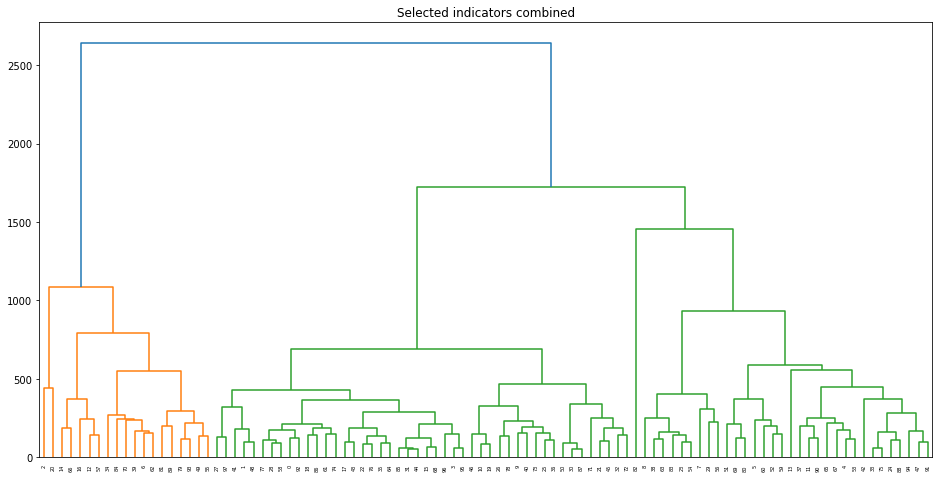

In [5]:
linkage_matrix, y_all = hierarchical_clustering.dendrogram_features_combined(
    selected_indicators_dict, "Selected indicators combined"
)

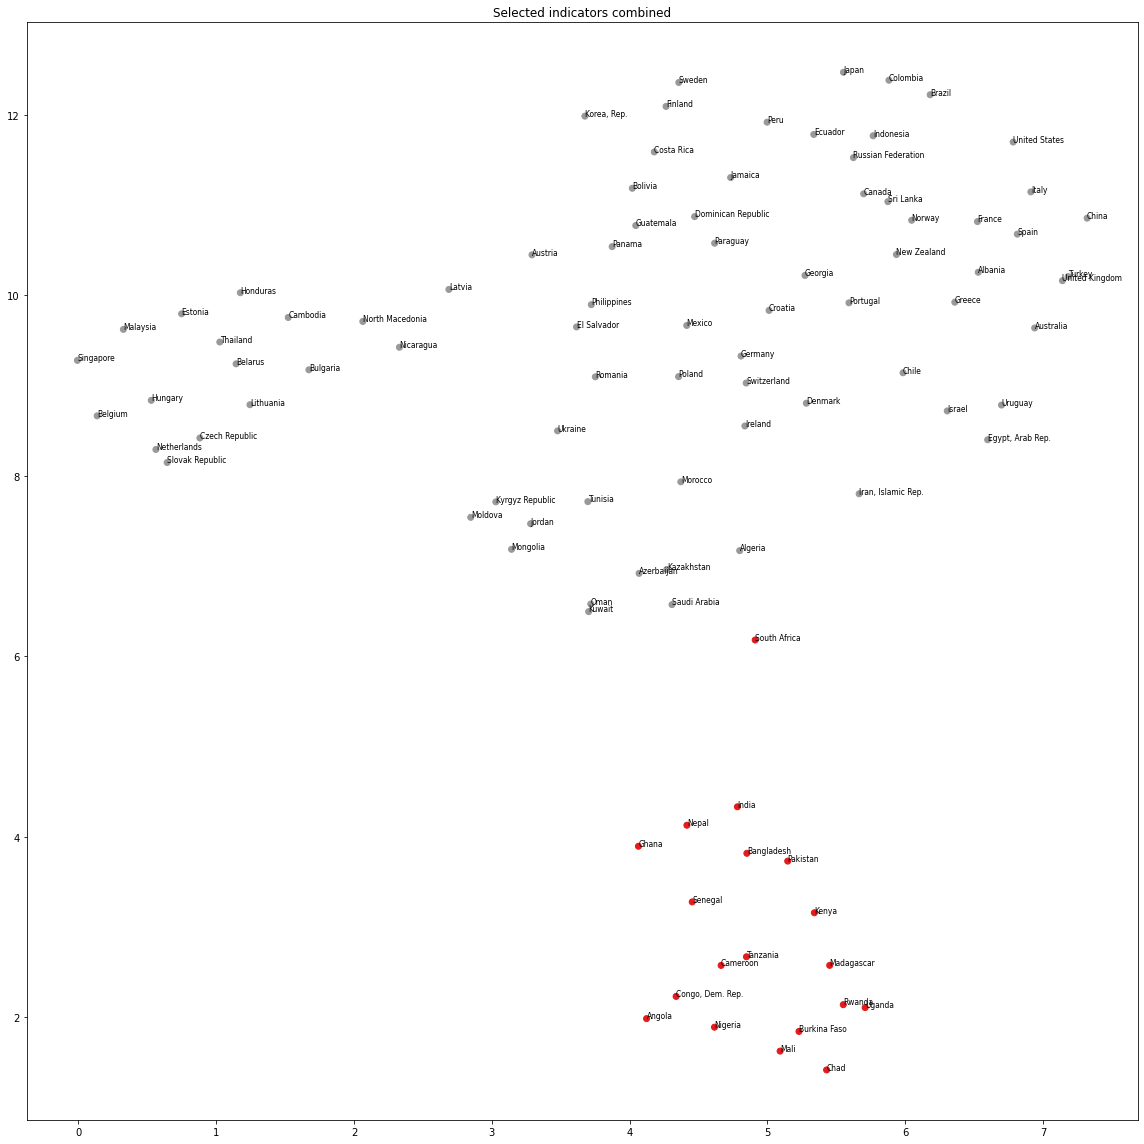

In [6]:
selected_indicators_combined_clustered = (
    hierarchical_clustering.cluster_combined_features(
        y_all, linkage_matrix, NUMBER_OF_CLUSTERS_SELECTED_INDICATORS_COMBINED
    )
)
data_combined_embedded_visualization(
    selected_indicators_combined_clustered, "Selected indicators combined"
)

## With feature extraction

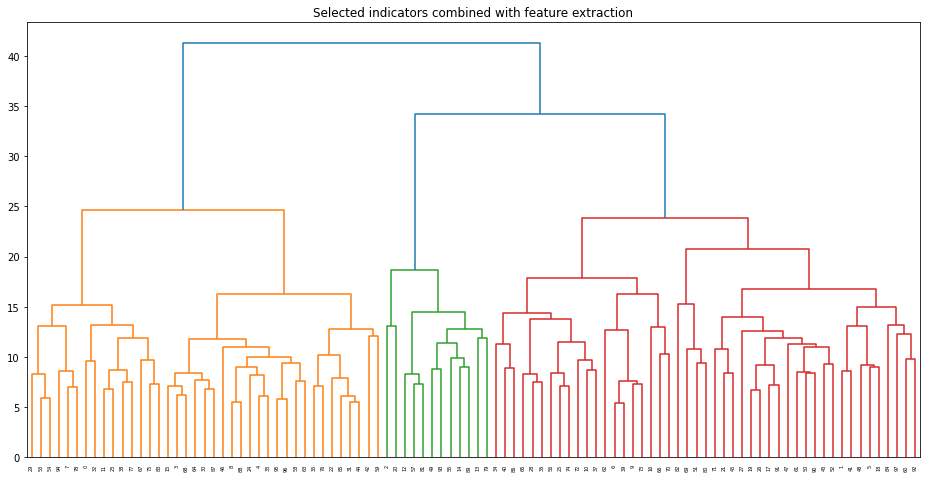

In [29]:
linkage_matrix, y_all = hierarchical_clustering.dendrogram_features_combined(
    selected_indicators_dict,
    "Selected indicators combined with feature extraction",
    feature_extraction=True,
)

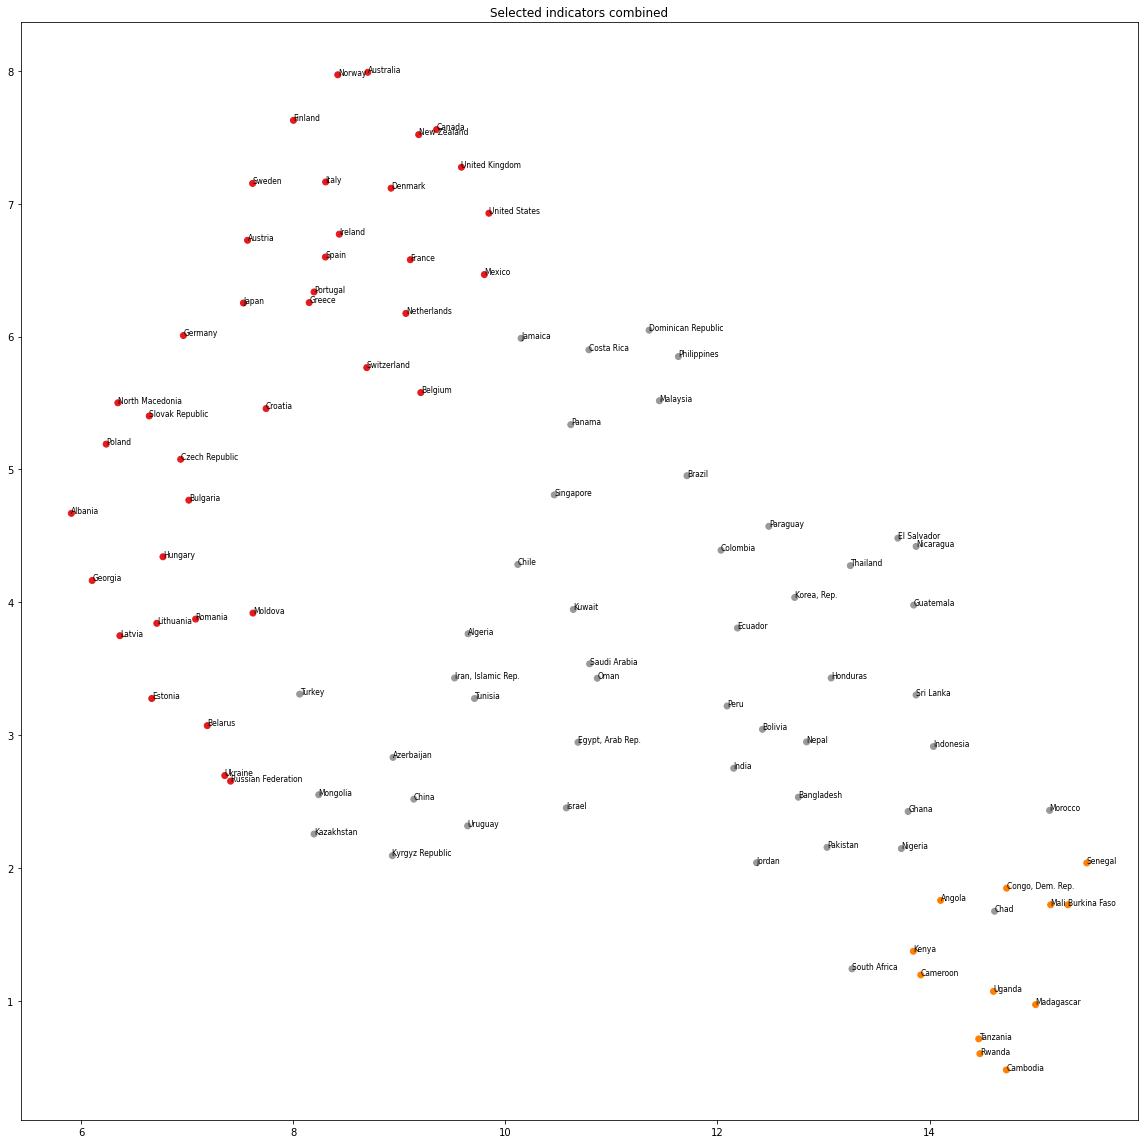

In [8]:
selected_indicators_combined_clustered = (
    hierarchical_clustering.cluster_combined_features(
        y_all,
        linkage_matrix,
        NUMBER_OF_CLUSTERS_SELECTED_INDICATORS_COMBINED_EXTRACTION,
    )
)
data_combined_embedded_visualization(
    selected_indicators_combined_clustered,
    "Selected indicators combined",
    feature_extraction=True,
)

# Agriculture indicators

In [9]:
NUMBER_OF_CLUSTERS_AGRICULTURE_INDICATORS_COMBINED = 2
NUMBER_OF_CLUSTERS_AGRICULTURE_INDICATORS_COMBINED_EXTRACTION = 2

agriculture_indicators_dict, countries, years = load_time_series(
    indicators=INDICATORS_AGRICULTURE
)

## No feature extraction

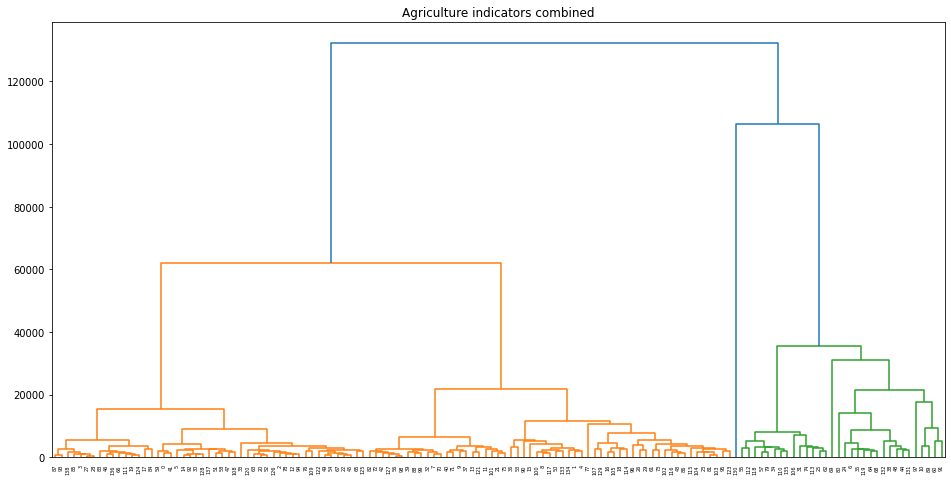

In [10]:
linkage_matrix, y_all = hierarchical_clustering.dendrogram_features_combined(
    agriculture_indicators_dict, "Agriculture indicators combined"
)

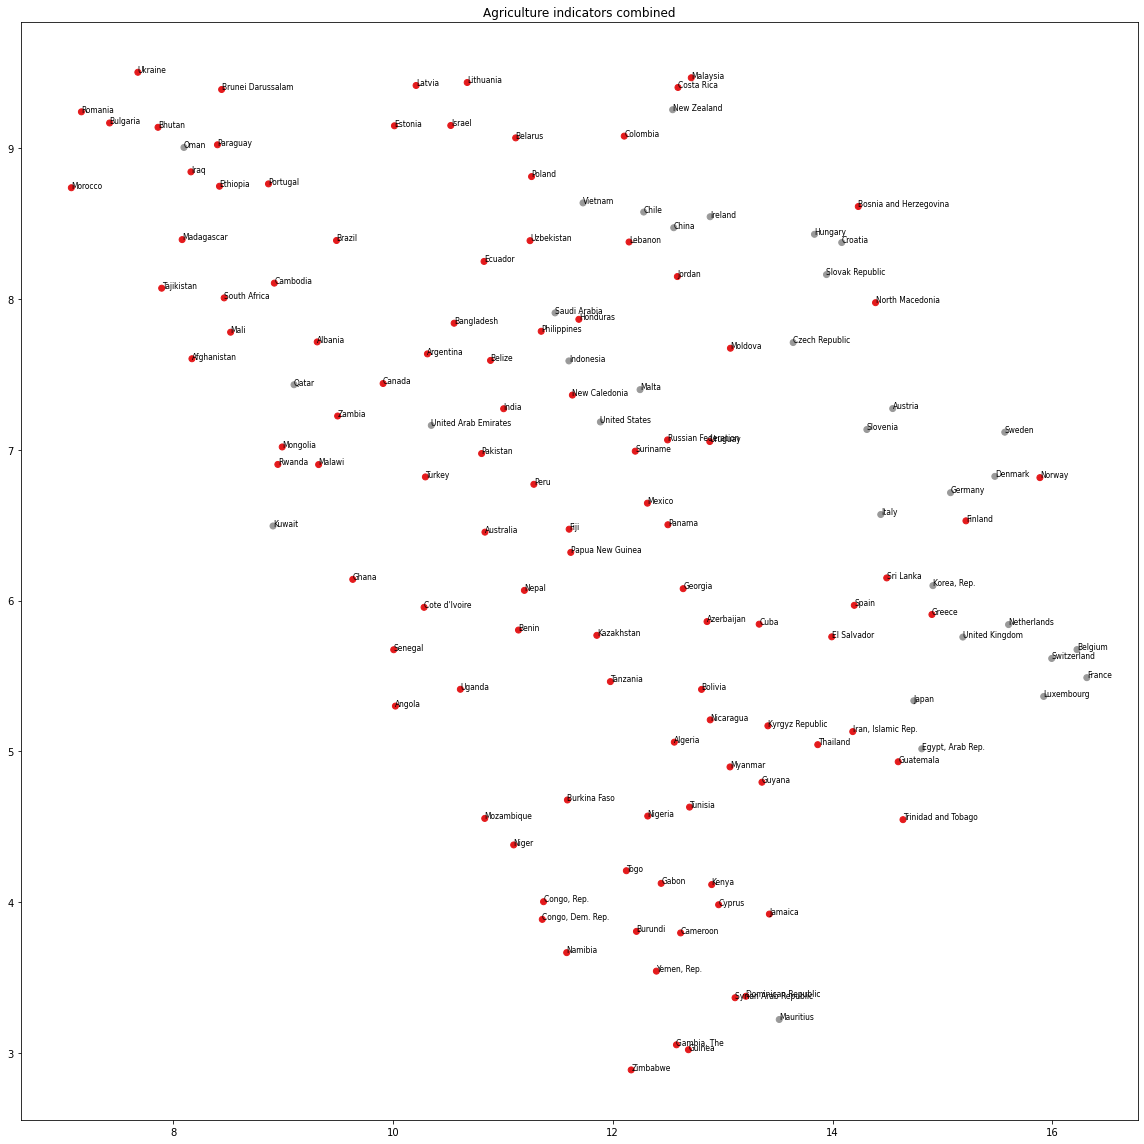

In [11]:
agriculture_indicators_combined_clustered = (
    hierarchical_clustering.cluster_combined_features(
        y_all, linkage_matrix, NUMBER_OF_CLUSTERS_AGRICULTURE_INDICATORS_COMBINED
    )
)
data_combined_embedded_visualization(
    agriculture_indicators_combined_clustered, "Agriculture indicators combined"
)

## With feature extraction

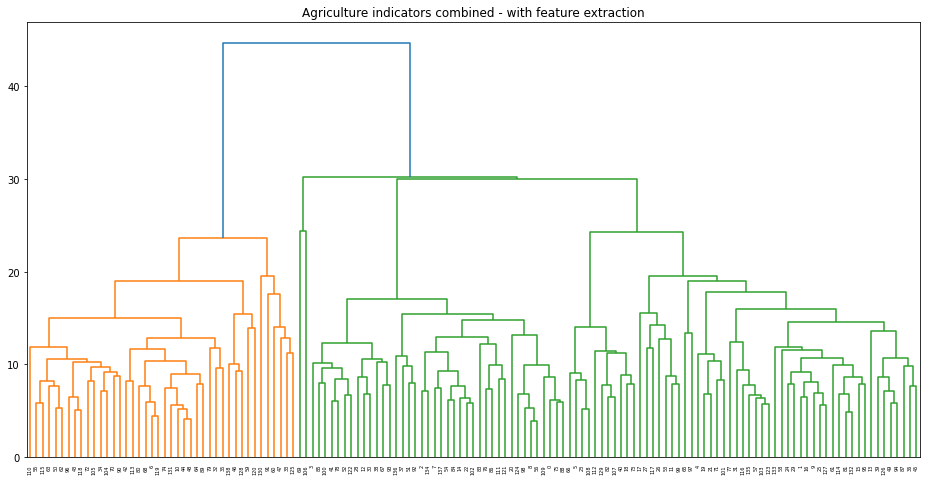

In [12]:
linkage_matrix, y_all = hierarchical_clustering.dendrogram_features_combined(
    agriculture_indicators_dict,
    "Agriculture indicators combined - with feature extraction",
    feature_extraction=True,
)

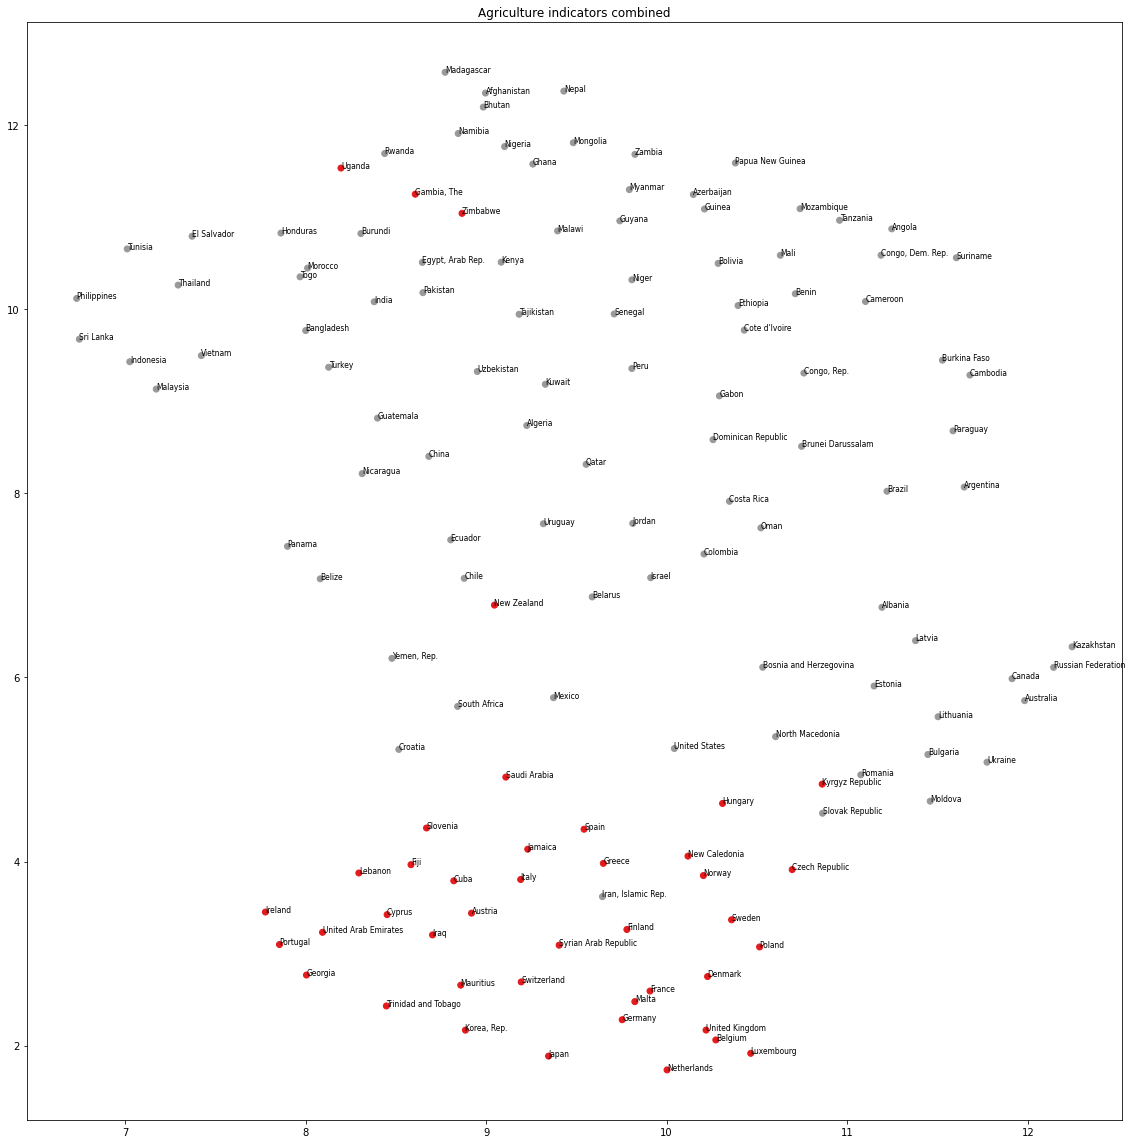

In [13]:
agriculture_indicators_combined_clustered = (
    hierarchical_clustering.cluster_combined_features(
        y_all,
        linkage_matrix,
        NUMBER_OF_CLUSTERS_AGRICULTURE_INDICATORS_COMBINED_EXTRACTION,
    )
)
data_combined_embedded_visualization(
    agriculture_indicators_combined_clustered,
    "Agriculture indicators combined",
    feature_extraction=True,
)

# Health indicators

In [14]:
NUMBER_OF_CLUSTERS_HEALTH_INDICATORS_COMBINED = 3
NUMBER_OF_CLUSTERS_HEALTH_INDICATORS_COMBINED_EXTRACTION = 2

health_indicators_dict, countries, years = load_time_series(
    indicators=INDICATORS_HEALTH
)

## No feature extraction

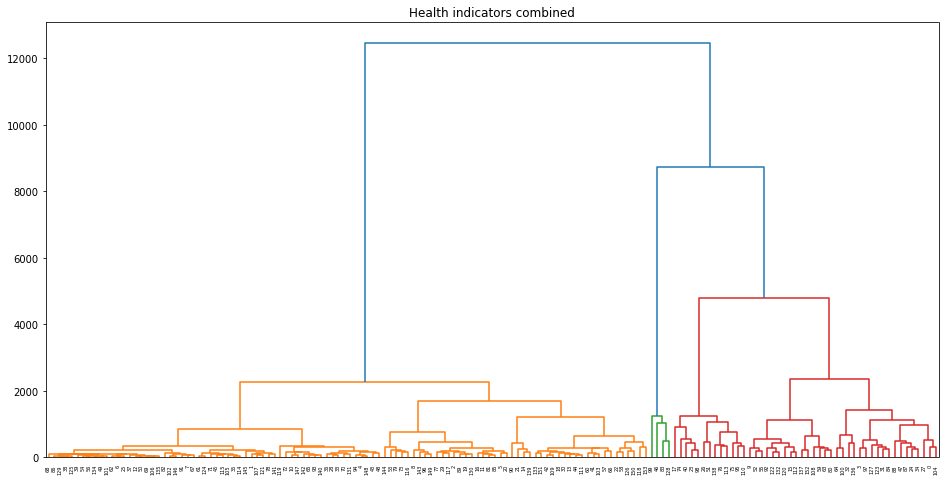

In [15]:
linkage_matrix, y_all = hierarchical_clustering.dendrogram_features_combined(
    health_indicators_dict, "Health indicators combined"
)

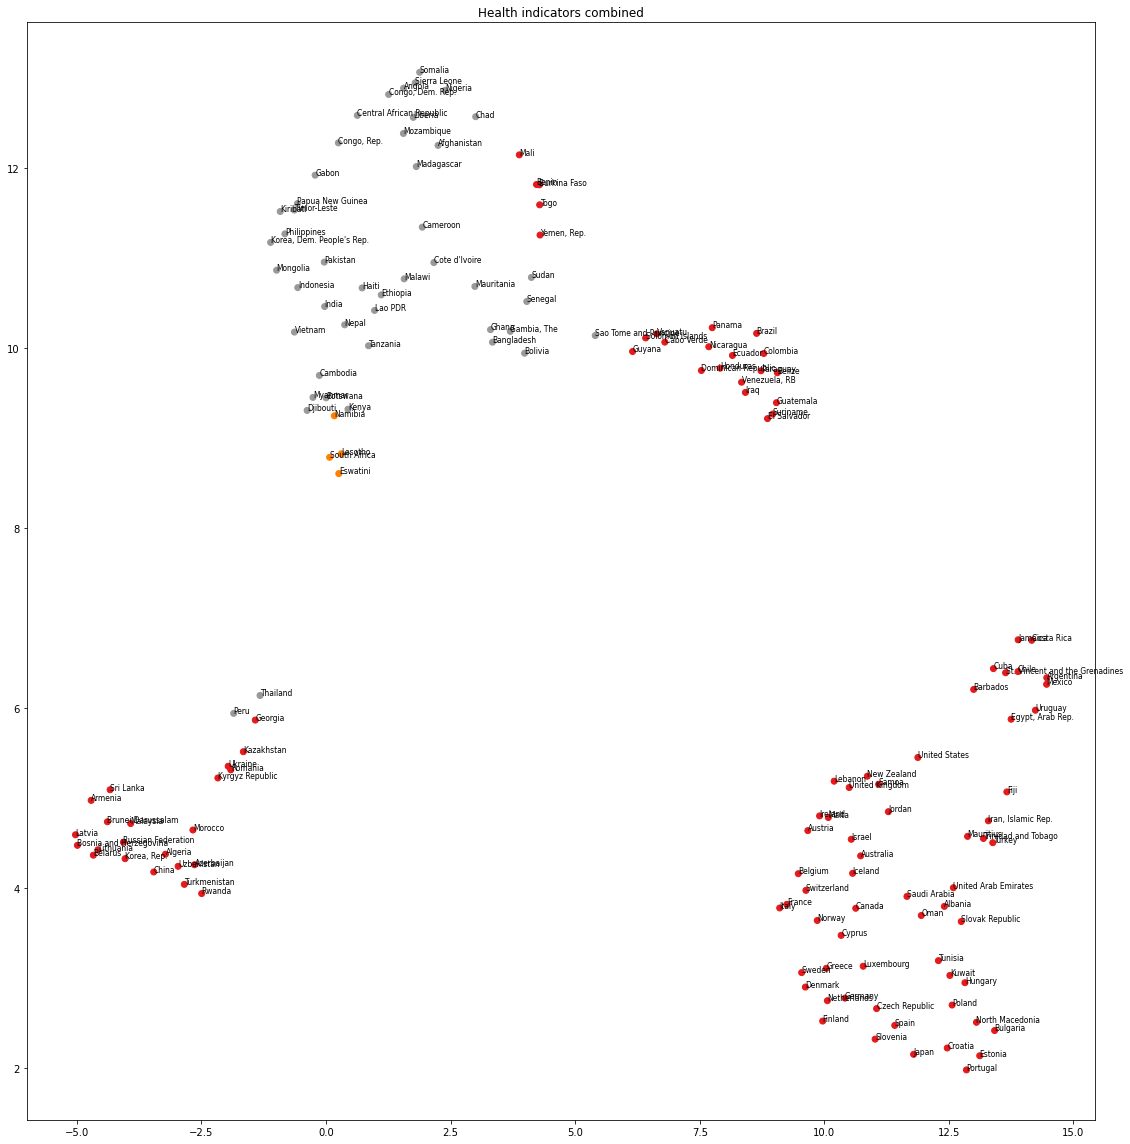

In [16]:
health_indicators_combined_clustered = (
    hierarchical_clustering.cluster_combined_features(
        y_all, linkage_matrix, NUMBER_OF_CLUSTERS_HEALTH_INDICATORS_COMBINED
    )
)
data_combined_embedded_visualization(
    health_indicators_combined_clustered, "Health indicators combined"
)

## With feature extraction

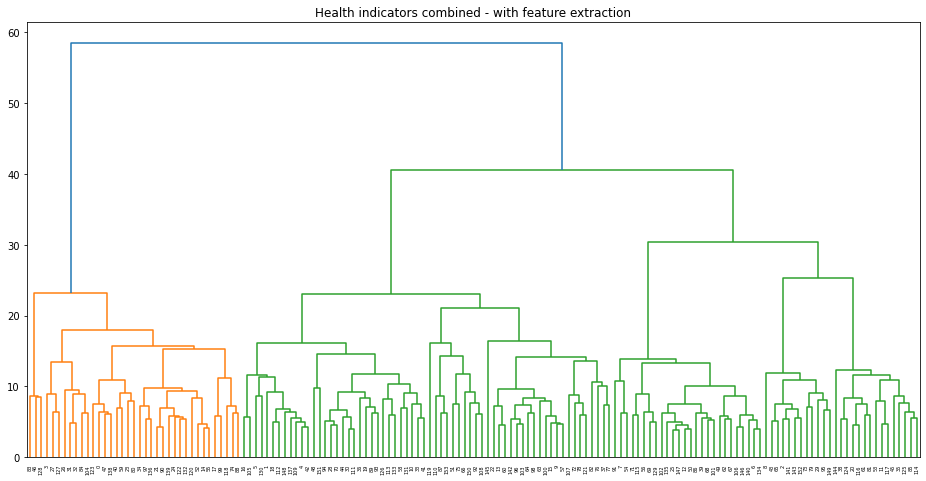

In [17]:
linkage_matrix, y_all = hierarchical_clustering.dendrogram_features_combined(
    health_indicators_dict,
    "Health indicators combined - with feature extraction",
    feature_extraction=True,
)

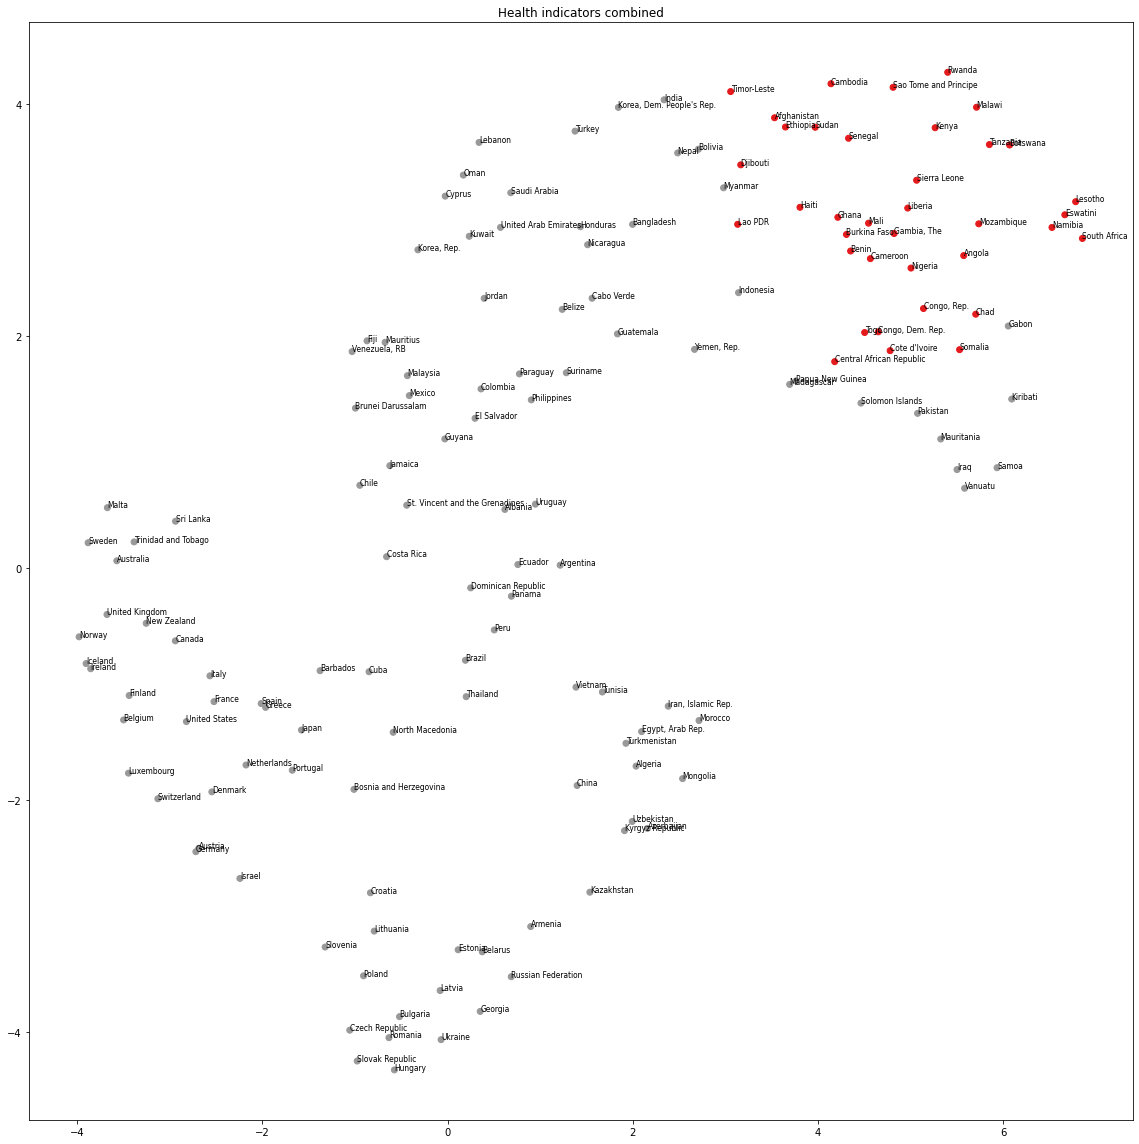

In [18]:
health_indicators_combined_clustered = (
    hierarchical_clustering.cluster_combined_features(
        y_all, linkage_matrix, NUMBER_OF_CLUSTERS_HEALTH_INDICATORS_COMBINED_EXTRACTION
    )
)
data_combined_embedded_visualization(
    health_indicators_combined_clustered,
    "Health indicators combined",
    feature_extraction=True,
)

# Economy indicators

In [19]:
NUMBER_OF_CLUSTERS_ECONOMY_INDICATORS_COMBINED = 3
NUMBER_OF_CLUSTERS_ECONOMY_INDICATORS_COMBINED_EXTRACTION = 3

economy_indicators_dict, countries, years = load_time_series(
    indicators=INDICATORS_ECONOMY
)

## No feature extraction

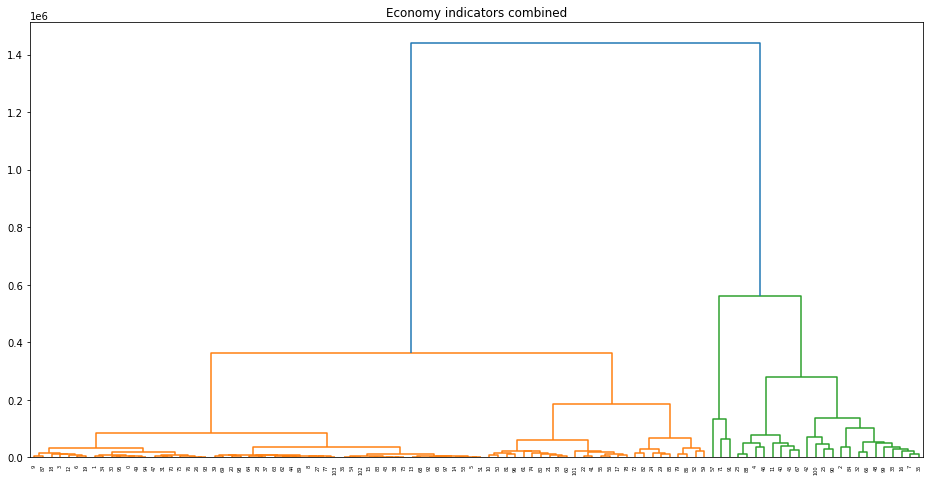

In [20]:
linkage_matrix, y_all = hierarchical_clustering.dendrogram_features_combined(
    economy_indicators_dict, "Economy indicators combined"
)

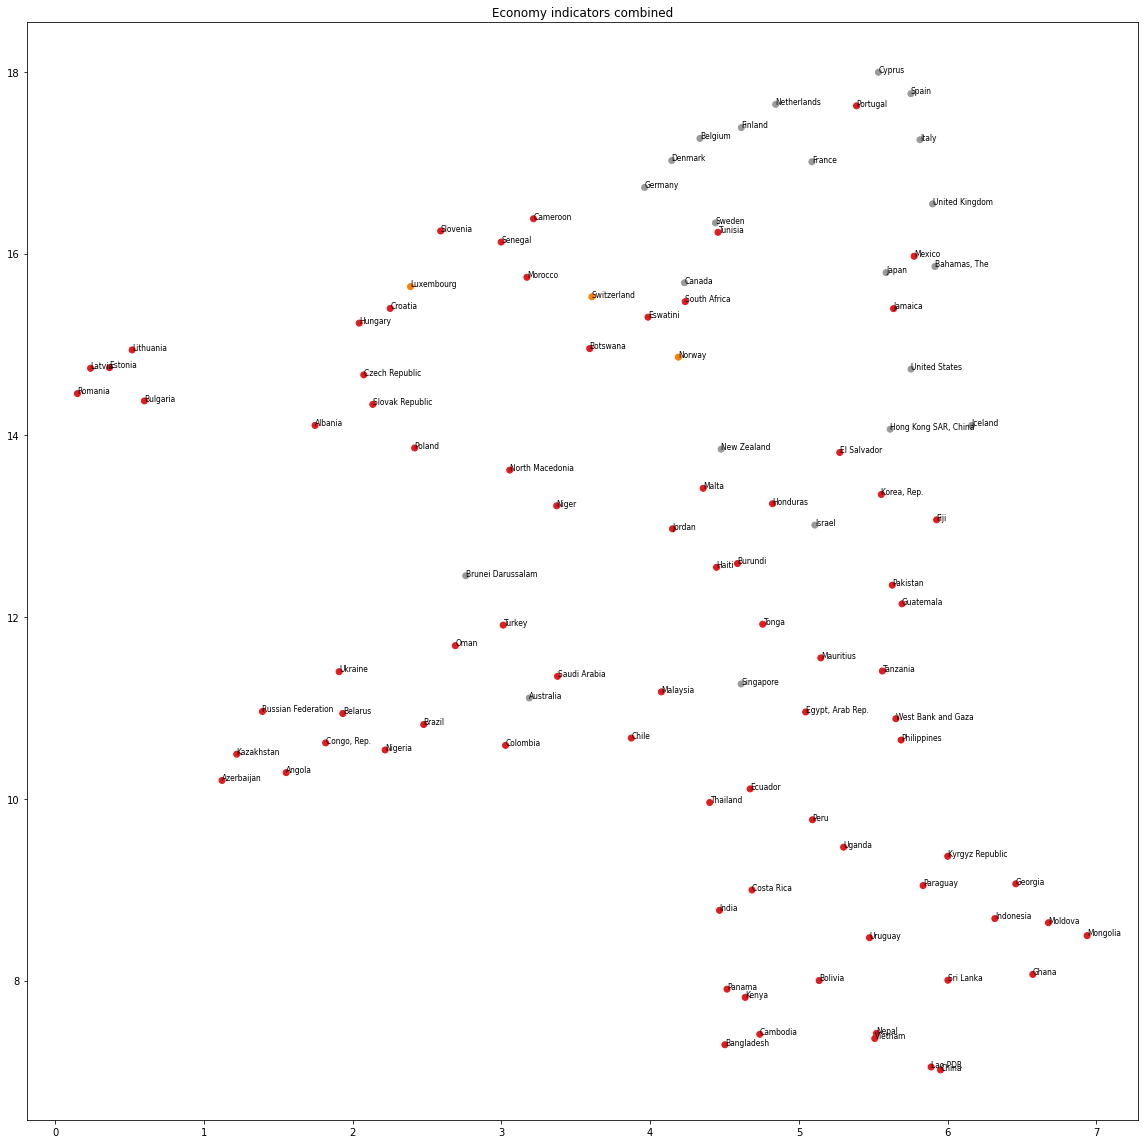

In [21]:
economy_indicators_combined_clustered = (
    hierarchical_clustering.cluster_combined_features(
        y_all, linkage_matrix, NUMBER_OF_CLUSTERS_ECONOMY_INDICATORS_COMBINED
    )
)
data_combined_embedded_visualization(
    economy_indicators_combined_clustered, "Economy indicators combined"
)

## With feature extraction

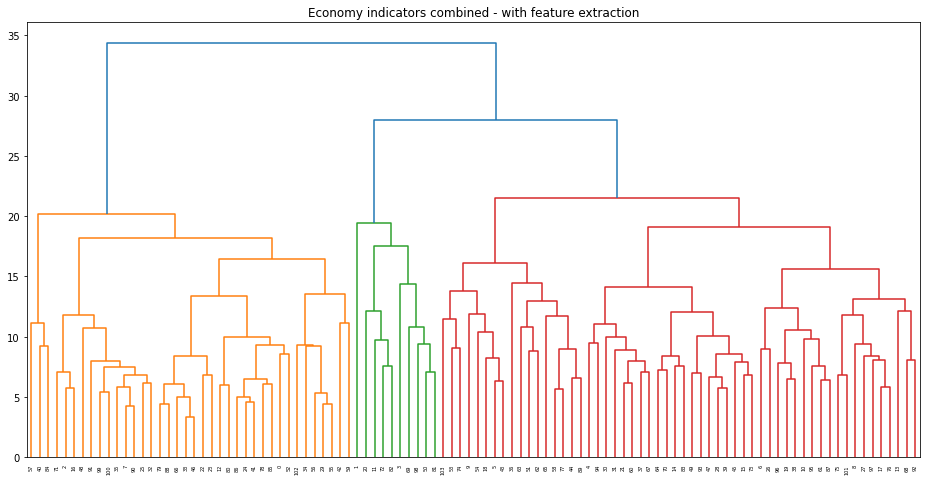

In [22]:
linkage_matrix, y_all = hierarchical_clustering.dendrogram_features_combined(
    economy_indicators_dict,
    "Economy indicators combined - with feature extraction",
    feature_extraction=True,
)

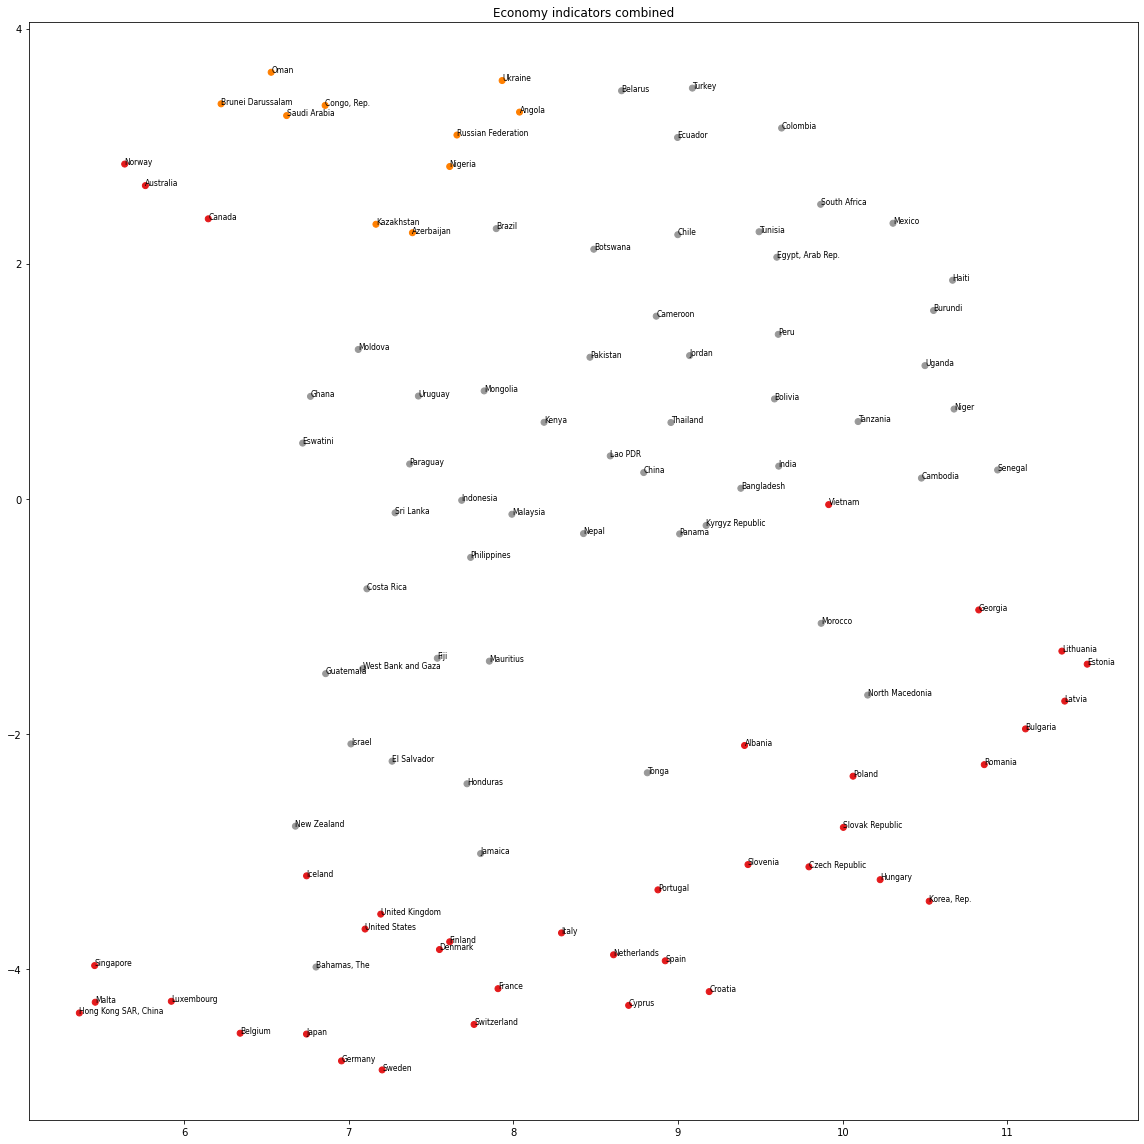

In [23]:
economy_indicators_combined_clustered = (
    hierarchical_clustering.cluster_combined_features(
        y_all, linkage_matrix, NUMBER_OF_CLUSTERS_ECONOMY_INDICATORS_COMBINED_EXTRACTION
    )
)
data_combined_embedded_visualization(
    economy_indicators_combined_clustered,
    "Economy indicators combined",
    feature_extraction=True,
)

# All indicators

In [24]:
NUMBER_OF_CLUSTERS_ALL_INDICATORS_COMBINED = 2
NUMBER_OF_CLUSTERS_ALL_INDICATORS_COMBINED_EXTRACTION = 4

all_indicators_dict, countries, years = load_time_series(indicators=ALL_INDICATORS)

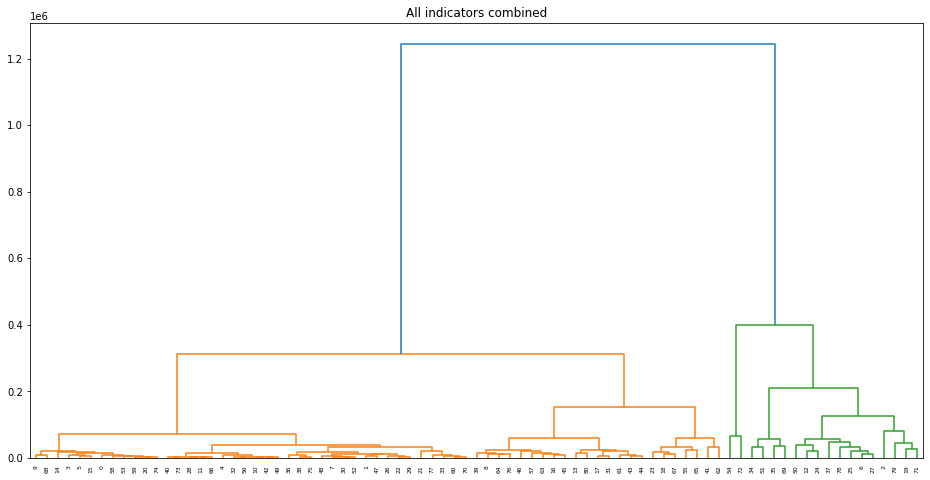

In [25]:
linkage_matrix, y_all = hierarchical_clustering.dendrogram_features_combined(
    all_indicators_dict, "All indicators combined"
)

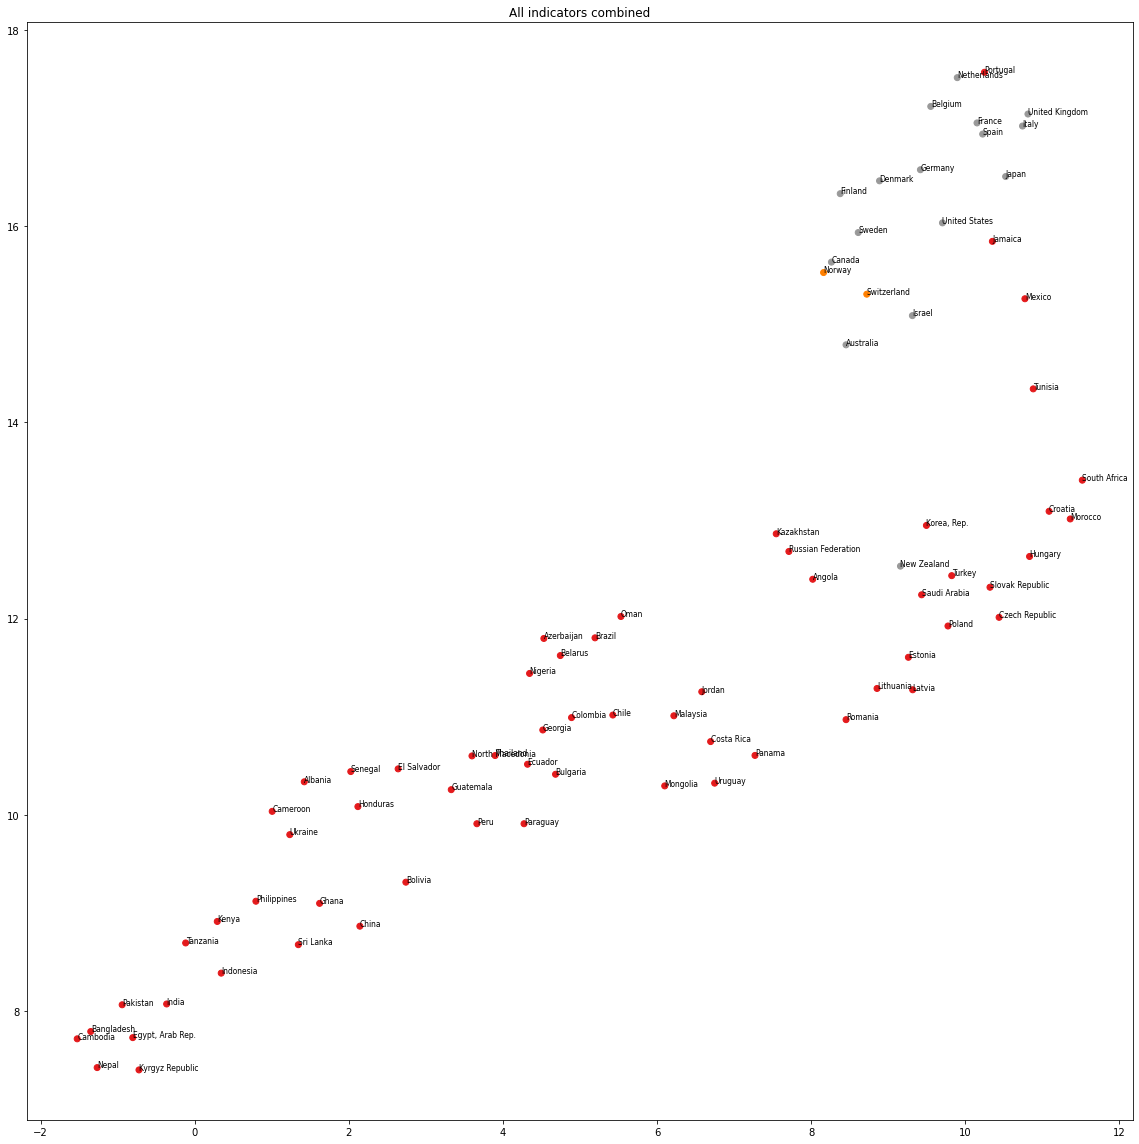

In [26]:
all_indicators_combined_clustered = hierarchical_clustering.cluster_combined_features(
    y_all, linkage_matrix, NUMBER_OF_CLUSTERS_ECONOMY_INDICATORS_COMBINED
)
data_combined_embedded_visualization(
    all_indicators_combined_clustered, "All indicators combined"
)

## With feature extraction

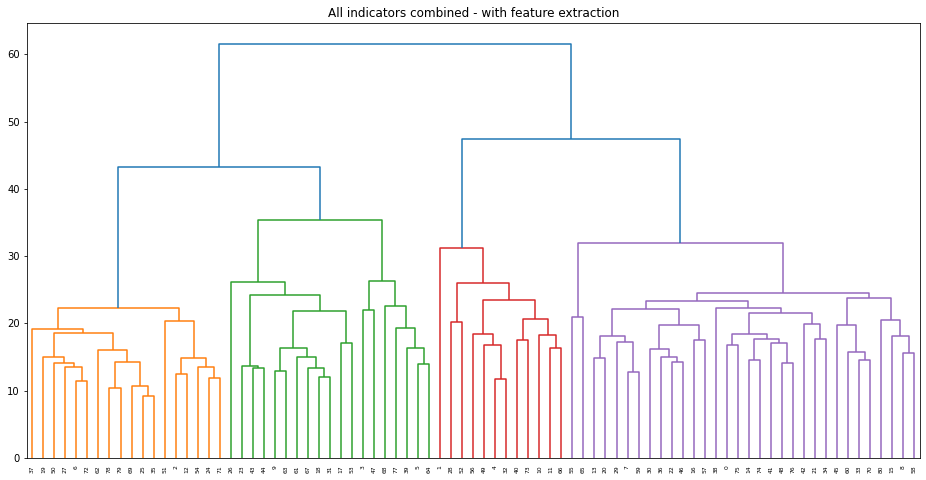

In [27]:
linkage_matrix, y_all = hierarchical_clustering.dendrogram_features_combined(
    all_indicators_dict,
    "All indicators combined - with feature extraction",
    feature_extraction=True,
)

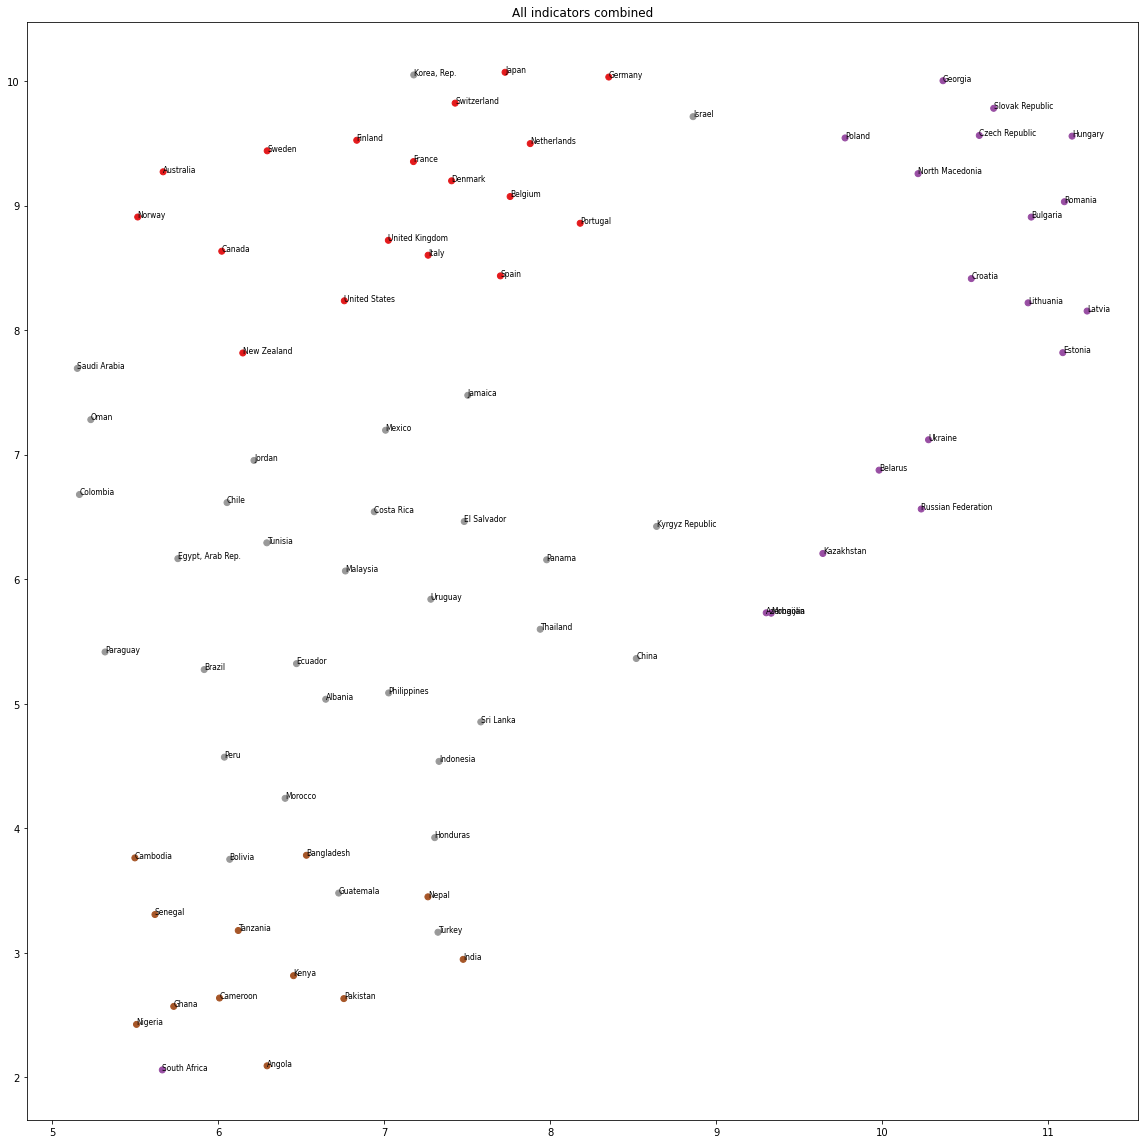

In [28]:
all_indicators_combined_clustered = hierarchical_clustering.cluster_combined_features(
    y_all, linkage_matrix, NUMBER_OF_CLUSTERS_ALL_INDICATORS_COMBINED_EXTRACTION
)
data_combined_embedded_visualization(
    all_indicators_combined_clustered,
    "All indicators combined",
    feature_extraction=True,
)